In [1]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
access_token = "633287737-JY8npppK9lxrSkLVCWmFQBxWef9IaL2xuucQCKAx"
access_secret = "UL3TzRsoLV1v1go8ZqEFIVYBuWu7dHdJtHD5SjD5v9UJW"
consumer_key = "TqOjrfWC2P3wIDLrLzOCcO7Ai"
consumer_secret = "3B81LIujhSWlQR3I7Dl4Ms44Qx1egld1Wvk2oond5ga9o3wMjc"

In [3]:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="RobertDowneyJr",count = 200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Proud to be an #Avenger. Congrats all! https://t.co/1nqFgQR13j

Important News! #ChefsForFeds is expanding across the nation 🇺🇸 to serve those impacted by the shutdown. Join us an… https://t.co/PKHYvLibdu

A natural addition @ChrisEvans https://t.co/zKAgyd9NNu

"Now it seems to me the place to start is at the beginning."
 Perry Mason
“And it seems to me the beginning of any… https://t.co/rGR5oQKgUu

@ChrisEvans hey @MarkRuffalo looks like Cap needs a little tutoring from the science bros.



In [5]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Proud to be an #Avenger. Congrats all! https:/...
1,Important News! #ChefsForFeds is expanding acr...
2,A natural addition @ChrisEvans https://t.co/zK...
3,"""Now it seems to me the place to start is at t..."
4,@ChrisEvans hey @MarkRuffalo looks like Cap ne...
5,"I'm up for the challenge. Happy New Year, ever..."
6,To my favorite dance partner... Happy birthday...
7,Merry Christmas from the man in the big red su...
8,✨ https://t.co/5q3LK9YK3I
9,Thanks for the holiday cheer @MarkRuffalo ! Le...


In [7]:
import operator
count = []
dates = []
for i in range(50):
    count.append(tweets[i].retweet_count)
    dates.append(str(tweets[i].created_at.date()))

dictionary = dict(zip(dates, count))
sorted_dict = sorted(dictionary.items(),  key=operator.itemgetter(0), reverse = True)
plot_data = sorted_dict[:20]
#data

Recent retweets count of Robert Downey Jr.


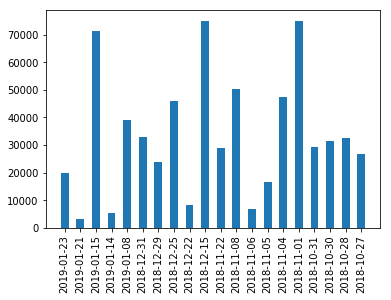

In [8]:
print("Recent retweets count of Robert Downey Jr.")
plt.bar(*zip(*plot_data),0.5)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [10]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Proud to be an #Avenger. Congrats all! https:/...,62,1087878174111744000,2019-01-23 01:02:23,Twitter Web Client,170198,19882
1,Important News! #ChefsForFeds is expanding acr...,140,1087392213326168064,2019-01-21 16:51:21,Twitter Web Client,22781,3202
2,A natural addition @ChrisEvans https://t.co/zK...,54,1085213269588103172,2019-01-15 16:33:00,Twitter Media Studio,359855,71431
3,"""Now it seems to me the place to start is at t...",139,1084903953941245955,2019-01-14 20:03:53,Twitter Web Client,55723,5332
4,@ChrisEvans hey @MarkRuffalo looks like Cap ne...,90,1082428211617615872,2019-01-08 00:06:10,Twitter Web Client,247412,38897
5,"I'm up for the challenge. Happy New Year, ever...",75,1079810209109794820,2018-12-31 18:43:10,Twitter Web Client,203233,32850
6,To my favorite dance partner... Happy birthday...,71,1079073304932044800,2018-12-29 17:54:58,Twitter Web Client,173339,23679
7,Merry Christmas from the man in the big red su...,73,1077601930954780672,2018-12-25 16:28:15,Twitter Web Client,274974,46066
8,✨ https://t.co/5q3LK9YK3I,25,1076546785349226496,2018-12-22 18:35:29,Twitter Web Client,27712,2333
9,Thanks for the holiday cheer @MarkRuffalo ! Le...,140,1076530782707957761,2018-12-22 17:31:54,Twitter Web Client,64808,8365


In [11]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
All the way down to the eye color. https://t.co/bUdp70z7bq
Number of likes: 385431
58 characters.

The tweet with more retweets is: 
One word: accurate. https://t.co/j0p22Mp0rX
Number of retweets: 82788
43 characters.



In [ ]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

In [ ]:
tfav.plot(figsize=(16,4), color='r',legend = True,label = 'Fav_Count')
tret.plot(figsize=(16,4), color='b',legend = True, label = 'Retweet_Count')

In [ ]:
tlen.plot(figsize=(20,4), color='r',legend = True, label='Tweet_Lengths')

In [ ]:
#For Pie Chart
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

In [ ]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
#data[data['SA']== -1]

In [ ]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

pos_percent = len(pos_tweets)*100/len(data['Tweets'])
neu_percent = len(neu_tweets)*100/len(data['Tweets'])
neg_percent = len(neg_tweets)*100/len(data['Tweets'])
# We print percentages:

print("Percentage of positive tweets: {}%".format(pos_percent))
print("Percentage of neutral tweets: {}%".format(neu_percent))
print("Percentage de negative tweets: {}%".format(neg_percent))

In [ ]:
piechart = pd.Series(np.array([pos_percent,neu_percent,neg_percent]), \
                     index = ['Positive','Neutral','Negative'], name = 'Tweets Sentiments')
x=piechart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))